> 🩺 Este notebook forma parte del proyecto **NutriSynthCare**, un entorno de simulación sobre salud pública y recomendaciones nutricionales personalizadas.  
>
> 👥 Desarrollado por:  
> - Daniel Cruz – [dCruzCoding](https://github.com/dCruzCoding)  
> - Aníbal García – [Aniballll](https://github.com/Aniballll)  
>
> 📁 Repositorio completo: [NutriSynthCare](https://github.com/dCruzCoding/NutriSynthCare)  
>
> 📜 Licencia: Este proyecto está disponible bajo la licencia MIT. Consulta el archivo `LICENSE` para más información.  
>
> 🙏 Agradecimientos especiales a todas las fuentes de datos y literatura científica que han hecho posible la creación de las bases sintéticas utilizadas en este proyecto.  
>
> 🤝 ¿Te interesa colaborar? ¡Estás invitado!  
> Puedes contribuir mejorando los notebooks, proponiendo nuevas ideas o corrigiendo errores:  
> - Haz un fork del repo  
> - Crea una rama (`git checkout -b mejora/nueva-idea`)  
> - Abre un Pull Request explicando tu propuesta

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Reproducibilidad
np.random.seed(42)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Cargamos los csv y lo convertimos en dataframe
df_precov_full = pd.read_csv("dbfinal_testing_MICE-NN.csv")

display(df_precov_full)

df_precov_full.info()

df = df_precov_full.drop(columns='Comunidad_Autonoma')
print("\nColumna 'Comunidad_Autonoma' eliminada.\n")
df = df.drop(columns=['Cohorte', 'Database'])
print("\nColumna 'Cohorte' y 'Database' eliminadas.\n")
df.columns


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,...,Trigliceridos,PAS,PAD,Cohorte,Tipo_Diabetes,HbA1c,Insulina,LDL,HDL,Database
0,2016,-0.804483,Hombre,Cataluña,Bajo,Moderado,24665.24,Alto,No consume,0.148211,...,-1.629256,-1.409088,-0.050570,cardio,NaN,NaN,NaN,NaN,NaN,Cardio
1,2013,1.050480,Mujer,Cataluña,Bajo,Sedentario,21693.89,Moderado,No consume,-0.142071,...,-0.355056,-0.620234,0.053357,cardio,NaN,NaN,NaN,NaN,NaN,Cardio
2,2017,1.335859,Mujer,País Vasco,Bajo,Moderado,15841.83,Moderado,No consume,0.443026,...,0.209912,-0.653449,0.394831,cardio,NaN,NaN,NaN,NaN,NaN,Cardio
3,2014,0.194343,Mujer,Aragón,Bajo,Sedentario,10548.19,Moderado,No consume,1.441094,...,0.251009,0.998992,1.181705,cardio,NaN,NaN,NaN,NaN,NaN,Cardio
4,2016,0.337033,Mujer,Andalucía,Moderado,Sedentario,15698.34,Moderado,Bajo,-0.076379,...,1.357513,-0.678360,-0.377197,cardio,NaN,NaN,NaN,NaN,NaN,Cardio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2018,-0.634414,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,-0.096697,...,-1.292582,-0.736235,-0.108231,diabetes,Tipo 1,5.84,4.45,110.97,64.42,Diabetes
15996,2012,-0.809270,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,0.745440,...,1.148761,0.084522,-0.072837,diabetes,Tipo 2,7.81,79.93,116.49,51.88,Diabetes
15997,2016,-0.109843,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,-0.426947,...,0.057810,-0.272904,0.009748,diabetes,Tipo 1,7.37,12.61,114.28,57.85,Diabetes
15998,2012,1.376441,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,-1.170009,...,-0.026358,0.501520,-0.096433,diabetes,Tipo 1,8.10,0.39,111.50,47.23,Diabetes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año_Registro           16000 non-null  int64  
 1   Edad                   16000 non-null  float64
 2   Sexo                   16000 non-null  object 
 3   Comunidad_Autonoma     8000 non-null   object 
 4   Riesgo_Cardiovascular  8000 non-null   object 
 5   Actividad_Fisica       8000 non-null   object 
 6   Ingresos_Anuales       8000 non-null   float64
 7   Nivel_Estres           8000 non-null   object 
 8   Consumo_Alcohol        8000 non-null   object 
 9   IMC                    16000 non-null  float64
 10  Diabetes               16000 non-null  int64  
 11  Colesterol_Total       16000 non-null  float64
 12  Trigliceridos          16000 non-null  float64
 13  PAS                    16000 non-null  float64
 14  PAD                    16000 non-null  float64
 15  Co

Index(['Año_Registro', 'Edad', 'Sexo', 'Riesgo_Cardiovascular',
       'Actividad_Fisica', 'Ingresos_Anuales', 'Nivel_Estres',
       'Consumo_Alcohol', 'IMC', 'Diabetes', 'Colesterol_Total',
       'Trigliceridos', 'PAS', 'PAD', 'Tipo_Diabetes', 'HbA1c', 'Insulina',
       'LDL', 'HDL'],
      dtype='object')

Realizando imputación inicial simple y robusta...

Comprobación: Total de NaNs tras imputación inicial: 0

========================= INICIANDO ITERACIÓN 1/5 =========================
Mejores 3 features seleccionadas globalmente: ['Trigliceridos', 'IMC', 'PAD']
Entrenando el modelo con pesos de clase...

--- Generando predicciones y evaluando calidad (Iteración 1) ---

----------- Evaluación para la variable: 'Insulina' -----------
  Tipo: Numérica | Métricas: R²=0.632, MAE=26.182
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HbA1c' -----------
  Tipo: Numérica | Métricas: R²=0.322, MAE=0.926
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'LDL' -----------
  Tipo: Numérica | Métricas: R²=0.287, MAE=7.798
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HDL' -----------
  Tipo: Numérica | Métricas: R²=0.358, MAE=5.208


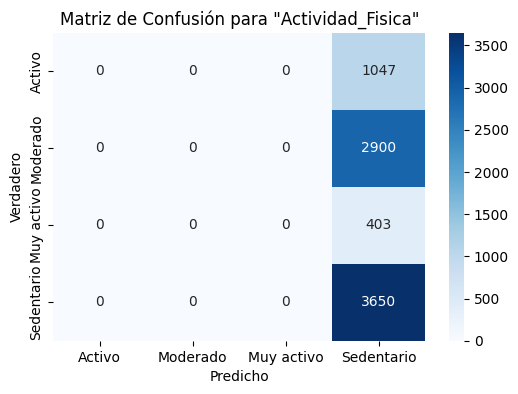

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Consumo_Alcohol' -----------
  Tipo: Categórica | Métricas: Accuracy=0.420, Weighted F1-Score=0.248
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       640
        Bajo       0.42      1.00      0.59      3360
    Moderado       0.00      0.00      0.00      1360
  No consume       0.00      0.00      0.00      2640

    accuracy                           0.42      8000
   macro avg       0.10      0.25      0.15      8000
weighted avg       0.18      0.42      0.25      8000



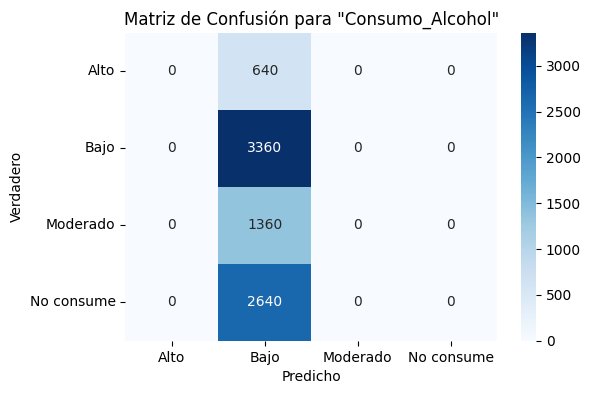

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Nivel_Estres' -----------
  Tipo: Categórica | Métricas: Accuracy=0.529, Weighted F1-Score=0.367
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.53      1.00      0.69      4236
        Bajo       0.00      0.00      0.00       210
    Moderado       0.00      0.00      0.00      3554

    accuracy                           0.53      8000
   macro avg       0.18      0.33      0.23      8000
weighted avg       0.28      0.53      0.37      8000



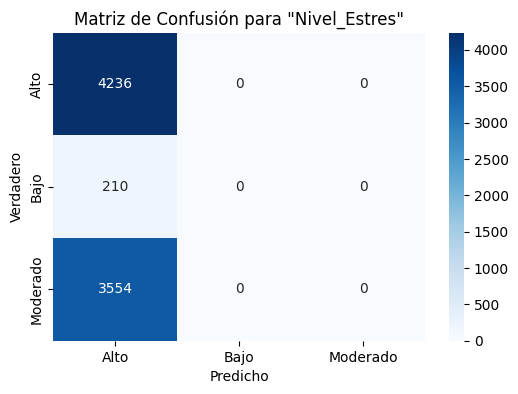

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Tipo_Diabetes' -----------
  Tipo: Categórica | Métricas: Accuracy=0.291, Weighted F1-Score=0.273
  Reporte de Clasificación:
               precision    recall  f1-score   support

 Gestacional       0.05      0.92      0.10       197
 No diabetes       1.00      0.02      0.03      2517
      Tipo 1       0.33      0.93      0.48      1309
      Tipo 2       1.00      0.22      0.36      3977

    accuracy                           0.29      8000
   macro avg       0.60      0.52      0.25      8000
weighted avg       0.87      0.29      0.27      8000



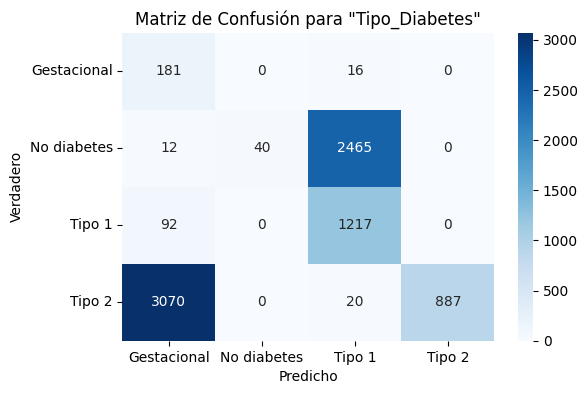

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Riesgo_Cardiovascular' -----------
  Tipo: Categórica | Métricas: Accuracy=0.461, Weighted F1-Score=0.291
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00      2044
        Bajo       0.46      1.00      0.63      3689
    Moderado       0.00      0.00      0.00      1415
    Muy Alto       0.00      0.00      0.00       852

    accuracy                           0.46      8000
   macro avg       0.12      0.25      0.16      8000
weighted avg       0.21      0.46      0.29      8000



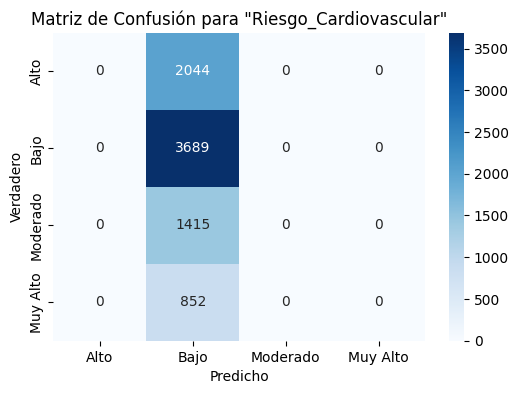

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

-------------------------------------------------------------
Resumen Iteración 1: Se actualizarán las imputaciones para 5 de 9 variables.
Variables a actualizar: ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Nivel_Estres']

========================= INICIANDO ITERACIÓN 2/5 =========================
Mejores 4 features seleccionadas globalmente: ['IMC', 'Trigliceridos', 'PAD', 'PAS']
Entrenando el modelo con pesos de clase...

--- Generando predicciones y evaluando calidad (Iteración 2) ---

----------- Evaluación para la variable: 'Insulina' -----------
  Tipo: Numérica | Métricas: R²=0.640, MAE=25.805
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HbA1c' -----------
  Tipo: Numérica | Métricas: R²=0.321, MAE=0.905
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'LDL' -----------
  Tipo: Numérica | Métricas:

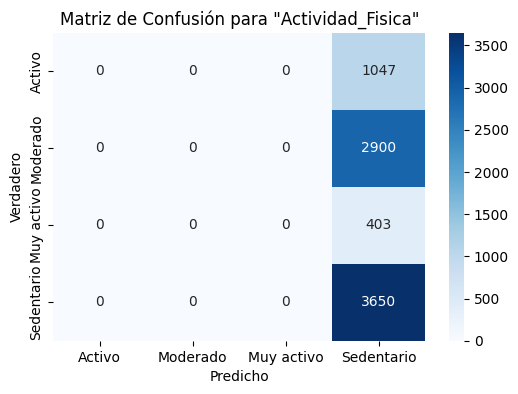

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Consumo_Alcohol' -----------
  Tipo: Categórica | Métricas: Accuracy=0.420, Weighted F1-Score=0.248
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       640
        Bajo       0.42      1.00      0.59      3360
    Moderado       0.00      0.00      0.00      1360
  No consume       0.00      0.00      0.00      2640

    accuracy                           0.42      8000
   macro avg       0.10      0.25      0.15      8000
weighted avg       0.18      0.42      0.25      8000



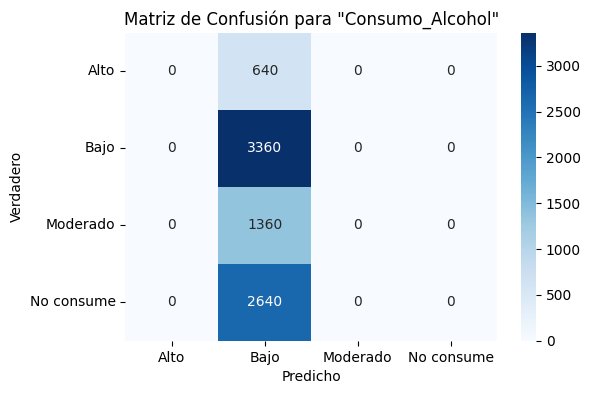

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Nivel_Estres' -----------
  Tipo: Categórica | Métricas: Accuracy=0.529, Weighted F1-Score=0.367
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.53      1.00      0.69      4236
        Bajo       0.00      0.00      0.00       210
    Moderado       0.00      0.00      0.00      3554

    accuracy                           0.53      8000
   macro avg       0.18      0.33      0.23      8000
weighted avg       0.28      0.53      0.37      8000



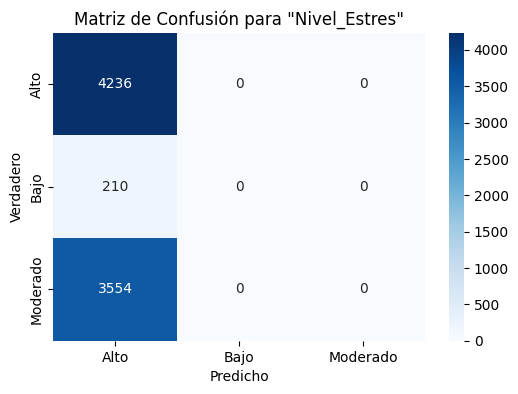

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Tipo_Diabetes' -----------
  Tipo: Categórica | Métricas: Accuracy=0.512, Weighted F1-Score=0.586
  Reporte de Clasificación:
               precision    recall  f1-score   support

 Gestacional       0.07      0.91      0.13       197
 No diabetes       0.83      0.56      0.67      2517
      Tipo 1       0.45      0.72      0.56      1309
      Tipo 2       1.00      0.40      0.57      3977

    accuracy                           0.51      8000
   macro avg       0.59      0.65      0.48      8000
weighted avg       0.83      0.51      0.59      8000



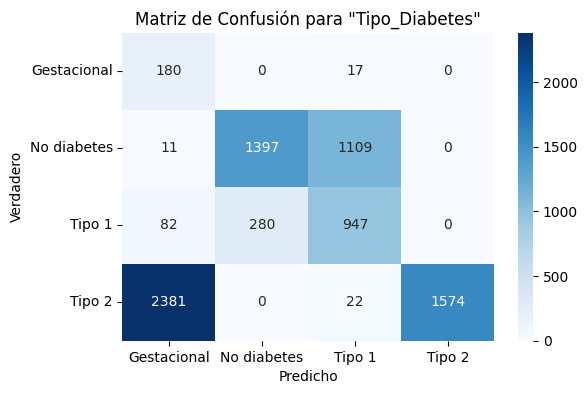

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Riesgo_Cardiovascular' -----------
  Tipo: Categórica | Métricas: Accuracy=0.461, Weighted F1-Score=0.291
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00      2044
        Bajo       0.46      1.00      0.63      3689
    Moderado       0.00      0.00      0.00      1415
    Muy Alto       0.00      0.00      0.00       852

    accuracy                           0.46      8000
   macro avg       0.12      0.25      0.16      8000
weighted avg       0.21      0.46      0.29      8000



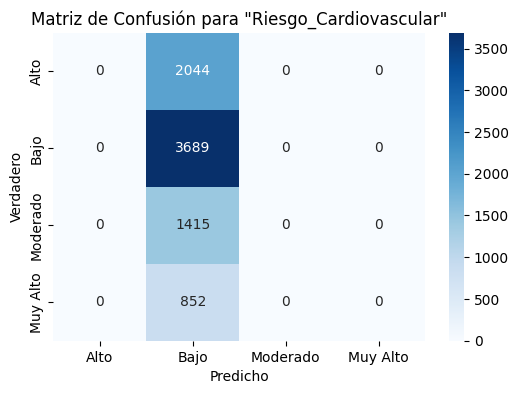

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

-------------------------------------------------------------
Resumen Iteración 2: Se actualizarán las imputaciones para 6 de 9 variables.
Variables a actualizar: ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Nivel_Estres', 'Tipo_Diabetes']

========================= INICIANDO ITERACIÓN 3/5 =========================
Mejores 4 features seleccionadas globalmente: ['Trigliceridos', 'IMC', 'PAD', 'PAS']
Entrenando el modelo con pesos de clase...

--- Generando predicciones y evaluando calidad (Iteración 3) ---

----------- Evaluación para la variable: 'Insulina' -----------
  Tipo: Numérica | Métricas: R²=0.644, MAE=25.653
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HbA1c' -----------
  Tipo: Numérica | Métricas: R²=0.316, MAE=0.897
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'LDL' -----------
  Tipo: Num

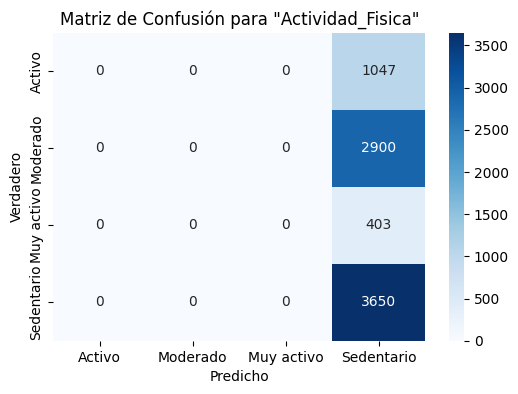

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Consumo_Alcohol' -----------
  Tipo: Categórica | Métricas: Accuracy=0.420, Weighted F1-Score=0.248
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       640
        Bajo       0.42      1.00      0.59      3360
    Moderado       0.00      0.00      0.00      1360
  No consume       0.00      0.00      0.00      2640

    accuracy                           0.42      8000
   macro avg       0.10      0.25      0.15      8000
weighted avg       0.18      0.42      0.25      8000



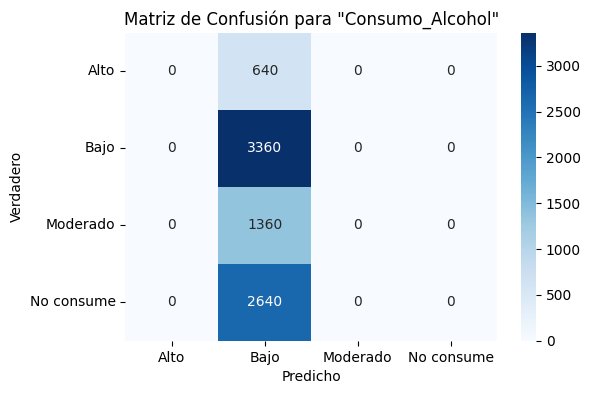

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Nivel_Estres' -----------
  Tipo: Categórica | Métricas: Accuracy=0.529, Weighted F1-Score=0.367
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.53      1.00      0.69      4236
        Bajo       0.00      0.00      0.00       210
    Moderado       0.00      0.00      0.00      3554

    accuracy                           0.53      8000
   macro avg       0.18      0.33      0.23      8000
weighted avg       0.28      0.53      0.37      8000



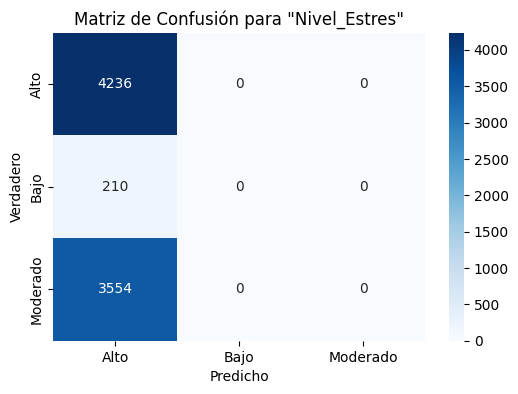

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Tipo_Diabetes' -----------
  Tipo: Categórica | Métricas: Accuracy=0.827, Weighted F1-Score=0.785
  Reporte de Clasificación:
               precision    recall  f1-score   support

 Gestacional       0.73      0.11      0.19       197
 No diabetes       0.70      0.98      0.81      2517
      Tipo 1       0.64      0.16      0.26      1309
      Tipo 2       0.95      0.99      0.97      3977

    accuracy                           0.83      8000
   macro avg       0.76      0.56      0.56      8000
weighted avg       0.82      0.83      0.79      8000



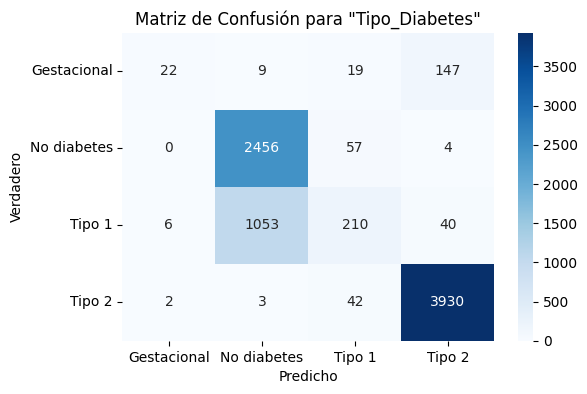

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Riesgo_Cardiovascular' -----------
  Tipo: Categórica | Métricas: Accuracy=0.461, Weighted F1-Score=0.291
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00      2044
        Bajo       0.46      1.00      0.63      3689
    Moderado       0.00      0.00      0.00      1415
    Muy Alto       0.00      0.00      0.00       852

    accuracy                           0.46      8000
   macro avg       0.12      0.25      0.16      8000
weighted avg       0.21      0.46      0.29      8000



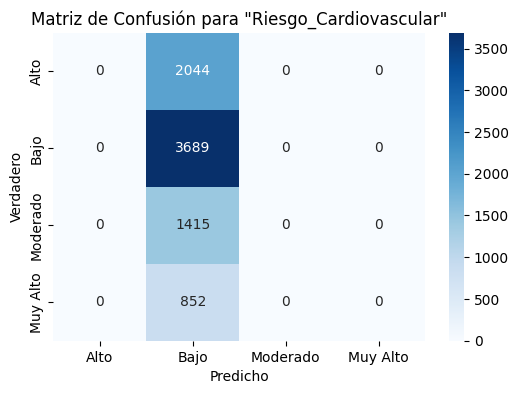

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

-------------------------------------------------------------
Resumen Iteración 3: Se actualizarán las imputaciones para 6 de 9 variables.
Variables a actualizar: ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Nivel_Estres', 'Tipo_Diabetes']

========================= INICIANDO ITERACIÓN 4/5 =========================
Mejores 4 features seleccionadas globalmente: ['Trigliceridos', 'IMC', 'PAD', 'PAS']
Entrenando el modelo con pesos de clase...

--- Generando predicciones y evaluando calidad (Iteración 4) ---

----------- Evaluación para la variable: 'Insulina' -----------
  Tipo: Numérica | Métricas: R²=0.645, MAE=25.580
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HbA1c' -----------
  Tipo: Numérica | Métricas: R²=0.340, MAE=0.899
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'LDL' -----------
  Tipo: Num

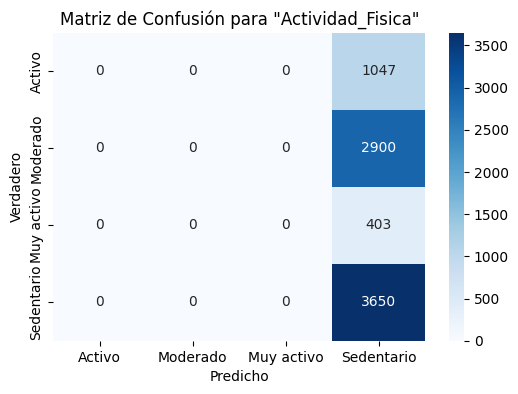

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Consumo_Alcohol' -----------
  Tipo: Categórica | Métricas: Accuracy=0.420, Weighted F1-Score=0.248
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       640
        Bajo       0.42      1.00      0.59      3360
    Moderado       0.00      0.00      0.00      1360
  No consume       0.00      0.00      0.00      2640

    accuracy                           0.42      8000
   macro avg       0.10      0.25      0.15      8000
weighted avg       0.18      0.42      0.25      8000



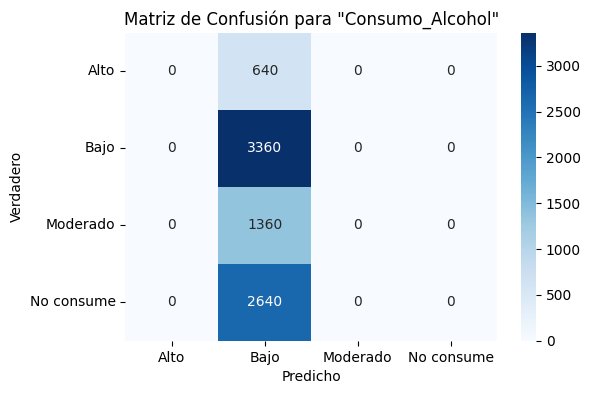

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Nivel_Estres' -----------
  Tipo: Categórica | Métricas: Accuracy=0.529, Weighted F1-Score=0.367
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.53      1.00      0.69      4236
        Bajo       0.00      0.00      0.00       210
    Moderado       0.00      0.00      0.00      3554

    accuracy                           0.53      8000
   macro avg       0.18      0.33      0.23      8000
weighted avg       0.28      0.53      0.37      8000



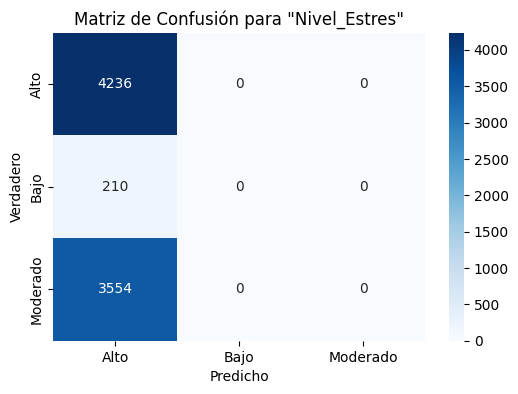

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Tipo_Diabetes' -----------
  Tipo: Categórica | Métricas: Accuracy=0.601, Weighted F1-Score=0.623
  Reporte de Clasificación:
               precision    recall  f1-score   support

 Gestacional       0.13      0.84      0.22       197
 No diabetes       0.91      0.22      0.36      2517
      Tipo 1       0.37      0.90      0.52      1309
      Tipo 2       0.99      0.73      0.84      3977

    accuracy                           0.60      8000
   macro avg       0.60      0.67      0.49      8000
weighted avg       0.84      0.60      0.62      8000



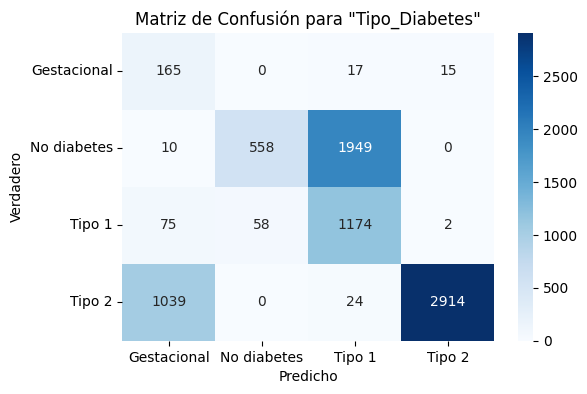

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Riesgo_Cardiovascular' -----------
  Tipo: Categórica | Métricas: Accuracy=0.461, Weighted F1-Score=0.291
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00      2044
        Bajo       0.46      1.00      0.63      3689
    Moderado       0.00      0.00      0.00      1415
    Muy Alto       0.00      0.00      0.00       852

    accuracy                           0.46      8000
   macro avg       0.12      0.25      0.16      8000
weighted avg       0.21      0.46      0.29      8000



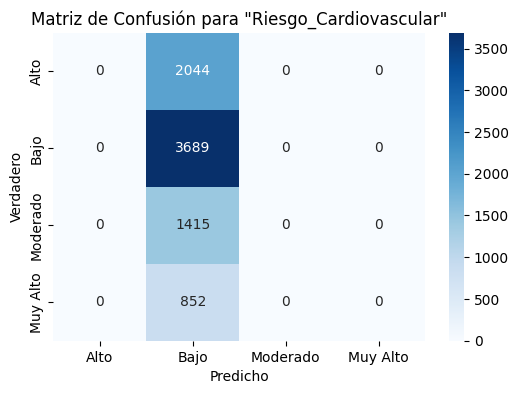

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

-------------------------------------------------------------
Resumen Iteración 4: Se actualizarán las imputaciones para 6 de 9 variables.
Variables a actualizar: ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Nivel_Estres', 'Tipo_Diabetes']

========================= INICIANDO ITERACIÓN 5/5 =========================
Mejores 4 features seleccionadas globalmente: ['Trigliceridos', 'IMC', 'PAD', 'PAS']
Entrenando el modelo con pesos de clase...

--- Generando predicciones y evaluando calidad (Iteración 5) ---

----------- Evaluación para la variable: 'Insulina' -----------
  Tipo: Numérica | Métricas: R²=0.646, MAE=25.524
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'HbA1c' -----------
  Tipo: Numérica | Métricas: R²=0.319, MAE=0.890
  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.

----------- Evaluación para la variable: 'LDL' -----------
  Tipo: Num

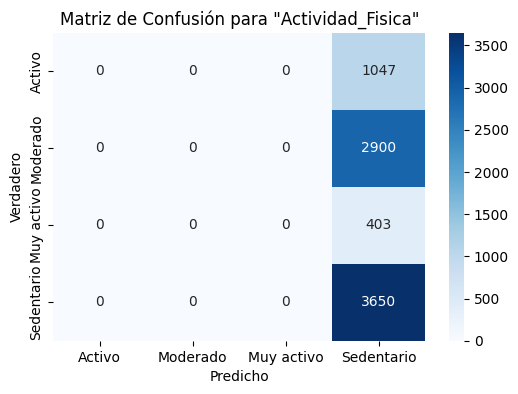

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Consumo_Alcohol' -----------
  Tipo: Categórica | Métricas: Accuracy=0.420, Weighted F1-Score=0.248
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       640
        Bajo       0.42      1.00      0.59      3360
    Moderado       0.00      0.00      0.00      1360
  No consume       0.00      0.00      0.00      2640

    accuracy                           0.42      8000
   macro avg       0.10      0.25      0.15      8000
weighted avg       0.18      0.42      0.25      8000



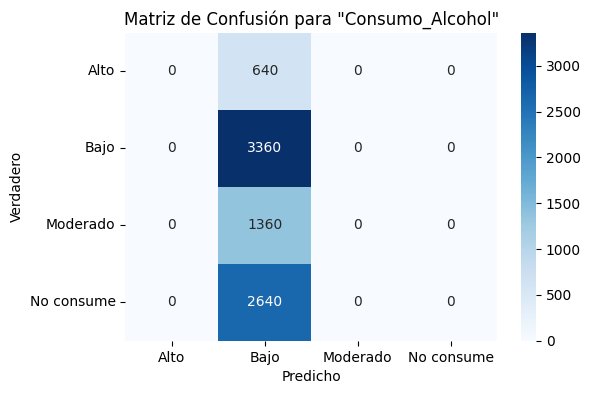

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

----------- Evaluación para la variable: 'Nivel_Estres' -----------
  Tipo: Categórica | Métricas: Accuracy=0.529, Weighted F1-Score=0.367
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.53      1.00      0.69      4236
        Bajo       0.00      0.00      0.00       210
    Moderado       0.00      0.00      0.00      3554

    accuracy                           0.53      8000
   macro avg       0.18      0.33      0.23      8000
weighted avg       0.28      0.53      0.37      8000



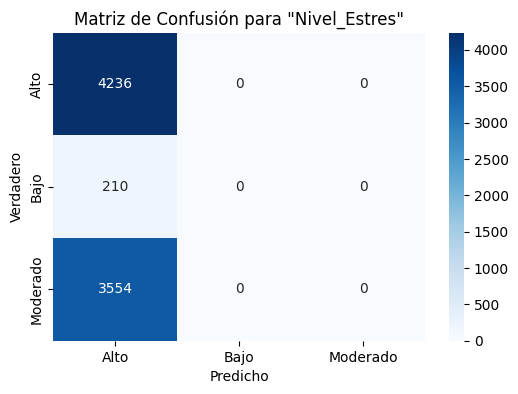

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Tipo_Diabetes' -----------
  Tipo: Categórica | Métricas: Accuracy=0.820, Weighted F1-Score=0.777
  Reporte de Clasificación:
               precision    recall  f1-score   support

 Gestacional       0.27      0.18      0.22       197
 No diabetes       0.69      0.98      0.81      2517
      Tipo 1       0.66      0.13      0.21      1309
      Tipo 2       0.96      0.98      0.97      3977

    accuracy                           0.82      8000
   macro avg       0.65      0.57      0.55      8000
weighted avg       0.81      0.82      0.78      8000



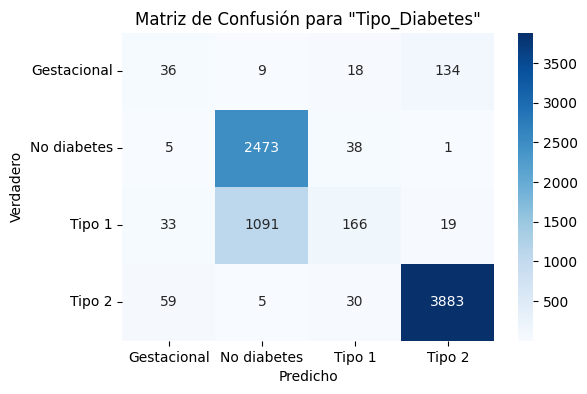

  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.

----------- Evaluación para la variable: 'Riesgo_Cardiovascular' -----------
  Tipo: Categórica | Métricas: Accuracy=0.461, Weighted F1-Score=0.291
  Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00      2044
        Bajo       0.46      1.00      0.63      3689
    Moderado       0.00      0.00      0.00      1415
    Muy Alto       0.00      0.00      0.00       852

    accuracy                           0.46      8000
   macro avg       0.12      0.25      0.16      8000
weighted avg       0.21      0.46      0.29      8000



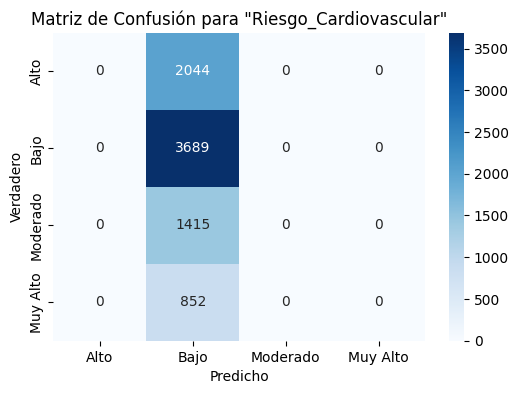

  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.

-------------------------------------------------------------
Resumen Iteración 5: Se actualizarán las imputaciones para 6 de 9 variables.
Variables a actualizar: ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Nivel_Estres', 'Tipo_Diabetes']

========================= IMPUTACIÓN FINALIZADA =========================
Valores faltantes en las columnas objetivo después del proceso:
Insulina                 0
HbA1c                    0
LDL                      0
HDL                      0
Actividad_Fisica         0
Consumo_Alcohol          0
Nivel_Estres             0
Tipo_Diabetes            0
Riesgo_Cardiovascular    0
dtype: int64

Vista previa del DataFrame final imputado:
   Año_Registro      Edad    Sexo Riesgo_Cardiovascular Actividad_Fisica  \
0          2016 -0.804483  Hombre                  Bajo         Moderado   
1          2013  1.050480   Mujer                  Bajo       Sedentario   
2          2017  1.335859

In [ ]:
# ==============================================================================
# 1. SETUP E IMPORTACIONES
# ==============================================================================
import torch
import torch.nn as nn
import torch.optim as optim

# Dependencias para evaluación, visualización y manejo de desbalance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, chi2, f_classif
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

warnings.simplefilter(action='ignore', category=FutureWarning)

# ==============================================================================
# 2. CONFIGURACIÓN DEL PROYECTO
# ==============================================================================

TODAS_LAS_NUMERICAS = ['Edad', 'IMC', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'Insulina', 'HbA1c', 'LDL', 'HDL']
TODAS_LAS_CATEGORICAS = ['Sexo', 'Diabetes', 'Actividad_Fisica', 'Consumo_Alcohol', 'Nivel_Estres', 'Tipo_Diabetes', 'Riesgo_Cardiovascular']
COLUMNAS_A_IMPUTAR = ['Insulina', 'HbA1c', 'LDL', 'HDL', 'Actividad_Fisica', 'Consumo_Alcohol', 'Nivel_Estres', 'Tipo_Diabetes', 'Riesgo_Cardiovascular']
imputar_num = [col for col in COLUMNAS_A_IMPUTAR if col in TODAS_LAS_NUMERICAS]
imputar_cat = [col for col in COLUMNAS_A_IMPUTAR if col in TODAS_LAS_CATEGORICAS]
N_TOP_FEATURES = 7
ITERACIONES, EPOCHS, BATCH_SIZE = 5, 20, 32
UMBRAL_R2_NUMERICO = 0.05
UMBRAL_F1_CATEGORICO = 0.3 # Umbral para el F1-score ponderado

# ==============================================================================
# 3. SELECCIÓN DE FEATURES ROBUSTA
# ==============================================================================
def seleccionar_mejores_features_robusto(df_input, columnas_a_imputar, n_top, todas_cat, todas_num):
    scores_acumulados = pd.Series(dtype=float)
    posibles_predictoras = df_input.columns.tolist()

    for target_col in columnas_a_imputar:
        columnas_predictoras = [c for c in posibles_predictoras if c != target_col]
        temp_df = pd.concat([df_input[columnas_predictoras], df_input[target_col]], axis=1).dropna()
        if len(temp_df) < 10: continue

        X_clean, y_clean = temp_df[columnas_predictoras], temp_df[target_col]
        X_num, X_cat = X_clean.select_dtypes(include=np.number), X_clean.select_dtypes(exclude=np.number)
        X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dtype=int)
        
        temp_scores = pd.Series(dtype=float)
        if pd.api.types.is_numeric_dtype(y_clean):
            X_encoded = pd.concat([X_num, X_cat_encoded], axis=1)
            if X_encoded.empty: continue
            f_scores, _ = f_regression(X_encoded, y_clean)
            temp_scores = pd.Series(f_scores, index=X_encoded.columns)
        else:
            y_encoded = y_clean.astype('category').cat.codes
            if not X_num.empty:
                f_scores_classif, _ = f_classif(X_num, y_encoded)
                temp_scores = temp_scores.add(pd.Series(f_scores_classif, index=X_num.columns), fill_value=0)
            if not X_cat_encoded.empty:
                chi_scores, _ = chi2(X_cat_encoded, y_encoded)
                temp_scores = temp_scores.add(pd.Series(chi_scores, index=X_cat_encoded.columns), fill_value=0)
        
        scores_acumulados = scores_acumulados.add(temp_scores, fill_value=0)

    if scores_acumulados.empty: return [c for c in df_input.columns if c not in columnas_a_imputar]
    
    n_final = min(n_top, len(scores_acumulados))
    top_features_encoded = scores_acumulados.nlargest(n_final).index.tolist()
    
    top_original_features = []
    cat_predictors_original = [c for c in df_input.columns if c in todas_cat and c not in columnas_a_imputar]
    num_predictors_original = [c for c in df_input.columns if c in todas_num and c not in columnas_a_imputar]
    
    for f in top_features_encoded:
        found = False
        for cat_col in cat_predictors_original:
            if f.startswith(cat_col + '_'):
                if cat_col not in top_original_features: top_original_features.append(cat_col)
                found = True
                break
        if not found and f in num_predictors_original and f not in top_original_features:
            top_original_features.append(f)
            
    print(f"Mejores {len(top_original_features)} features seleccionadas globalmente: {top_original_features}")
    return top_original_features

# ==============================================================================
# 4. MODELO DE RED NEURONAL (PYTORCH)
# ==============================================================================
class MiceNN(nn.Module):
    def __init__(self, n_features_in, imputar_num, imputar_cat, df_original):
        super(MiceNN, self).__init__()
        self.shared_layers = nn.Sequential(nn.Linear(n_features_in, 128), nn.ReLU(), nn.Dropout(0.3), nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.3))
        self.output_heads = nn.ModuleDict()
        for col in imputar_num: self.output_heads[f'output_{col}'] = nn.Linear(64, 1)
        for col in imputar_cat:
            n_classes = df_original[col].dropna().nunique()
            self.output_heads[f'output_{col}'] = nn.Linear(64, n_classes)
    def forward(self, x):
        shared_output = self.shared_layers(x)
        return {name: head(shared_output) for name, head in self.output_heads.items()}

# ==============================================================================
# 5. PROCESO DE IMPUTACIÓN MICE-NN
# ==============================================================================
df_imputado = df.copy()
print("Realizando imputación inicial simple y robusta...")
for col in df_imputado.columns:
    if df_imputado[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_imputado[col]):
            mediana = df_imputado[col].median()
            valor_a_imputar = 0 if pd.isna(mediana) else mediana
            df_imputado[col] = df_imputado[col].fillna(valor_a_imputar)
        else:
            if not df_imputado[col].mode().empty:
                df_imputado[col] = df_imputado[col].fillna(df_imputado[col].mode()[0])
            else:
                df_imputado[col] = df_imputado[col].fillna('Desconocido')
print(f"\nComprobación: Total de NaNs tras imputación inicial: {df_imputado.isnull().sum().sum()}")
mascaras_faltantes = {col: df[col].isnull() for col in COLUMNAS_A_IMPUTAR}

for i in range(ITERACIONES):
    print(f"\n{'='*25} INICIANDO ITERACIÓN {i+1}/{ITERACIONES} {'='*25}")
    columnas_predictoras = seleccionar_mejores_features_robusto(df_imputado, COLUMNAS_A_IMPUTAR, N_TOP_FEATURES, TODAS_LAS_CATEGORICAS, TODAS_LAS_NUMERICAS)
    cols_para_pipe_num = [c for c in columnas_predictoras if c in TODAS_LAS_NUMERICAS]
    cols_para_pipe_cat = [c for c in columnas_predictoras if c in TODAS_LAS_CATEGORICAS]
    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), cols_para_pipe_num),('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols_para_pipe_cat)], remainder='drop')
    if not columnas_predictoras:
        print("No se seleccionaron features, saltando iteración.")
        continue
    X_proc = preprocessor.fit_transform(df_imputado[columnas_predictoras])
    X_tensor = torch.tensor(X_proc, dtype=torch.float32)
    
    # --- CÁLCULO DE PESOS DE CLASE ---
    class_weights = {}
    for col in imputar_cat:
        labels = df_imputado[col].astype('category').cat.codes.values
        classes = np.unique(labels)
        weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
        class_weights[col] = torch.tensor(weights, dtype=torch.float32)

    y_tensors_dict = {}
    for col in imputar_num: y_tensors_dict[f'output_{col}'] = torch.tensor(df_imputado[col].values, dtype=torch.float32).view(-1, 1)
    for col in imputar_cat:
        df_imputado[col] = df_imputado[col].astype('category')
        y_tensors_dict[f'output_{col}'] = torch.tensor(df_imputado[col].cat.codes.values, dtype=torch.long)
    
    modelo = MiceNN(X_proc.shape[1], imputar_num, imputar_cat, df)
    criterion_num = nn.MSELoss()
    optimizer = optim.Adam(modelo.parameters(), lr=0.001)

    print("Entrenando el modelo con pesos de clase...")
    modelo.train()
    for epoch in range(EPOCHS):
        for j in range(0, len(X_tensor), BATCH_SIZE):
            X_batch, y_batch_dict = X_tensor[j:j+BATCH_SIZE], {k: v[j:j+BATCH_SIZE] for k, v in y_tensors_dict.items()}
            optimizer.zero_grad()
            outputs = modelo(X_batch)
            total_loss = 0
            for name, pred in outputs.items():
                target_col = name.replace('output_', '')
                if target_col in imputar_num:
                    loss = criterion_num(pred, y_batch_dict[name])
                else:
                    criterion_cat = nn.CrossEntropyLoss(weight=class_weights[target_col])
                    loss = criterion_cat(pred, y_batch_dict[name])
                total_loss += loss
            total_loss.backward(); optimizer.step()

    print("\n--- Generando predicciones y evaluando calidad (Iteración " + str(i+1) + ") ---")
    modelo.eval()
    with torch.no_grad(): predicciones_dict = modelo(X_tensor)
    df_predicciones = pd.DataFrame(index=df_imputado.index)
    columnas_a_actualizar = []
    
    for name, pred_tensor in predicciones_dict.items():
        col = name.replace('output_', '')
        pred_np = pred_tensor.detach().cpu().numpy()
        mask_observados = ~mascaras_faltantes[col]
        if mask_observados.sum() < 2:
            columnas_a_actualizar.append(col)
            continue
        print(f"\n----------- Evaluación para la variable: '{col}' -----------")
        if col in imputar_num:
            df_predicciones[col] = pred_np.flatten()
            y_true, y_pred = df_imputado.loc[mask_observados, col], df_predicciones.loc[mask_observados, col]
            r2, mae = r2_score(y_true, y_pred), mean_absolute_error(y_true, y_pred)
            print(f"  Tipo: Numérica | Métricas: R²={r2:.3f}, MAE={mae:.3f}")
            if r2 >= UMBRAL_R2_NUMERICO:
                print("  Resultado: CALIDAD SUFICIENTE. Se usará para la imputación.")
                columnas_a_actualizar.append(col)
            else: print("  Resultado: CALIDAD BAJA. Se descarta la imputación.")
        else:
            pred_indices = np.argmax(pred_np, axis=1)
            original_labels = df_imputado[col].cat.categories
            df_predicciones[col] = original_labels[pred_indices]
            y_true, y_pred = df_imputado.loc[mask_observados, col], df_predicciones.loc[mask_observados, col]
            
            report = classification_report(y_true, y_pred, zero_division=0, labels=original_labels, output_dict=True)
            acc = report['accuracy']
            weighted_f1 = report['weighted avg']['f1-score']
            
            print(f"  Tipo: Categórica | Métricas: Accuracy={acc:.3f}, Weighted F1-Score={weighted_f1:.3f}")
            print("  Reporte de Clasificación:\n", classification_report(y_true, y_pred, zero_division=0, labels=original_labels))
            cm = confusion_matrix(y_true, y_pred, labels=original_labels)
            plt.figure(figsize=(6, 4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
            plt.xlabel('Predicho'); plt.ylabel('Verdadero'); plt.title(f'Matriz de Confusión para "{col}"'); plt.show()
            
            if weighted_f1 >= UMBRAL_F1_CATEGORICO:
                print("  Resultado: CALIDAD SUFICIENTE (basado en F1-score). Se usará para la imputación.")
                columnas_a_actualizar.append(col)
            else: print("  Resultado: CALIDAD BAJA (basado en F1-score). Se descarta la imputación.")

    print("\n-------------------------------------------------------------")
    print(f"Resumen Iteración {i+1}: Se actualizarán las imputaciones para {len(columnas_a_actualizar)} de {len(COLUMNAS_A_IMPUTAR)} variables.")
    print(f"Variables a actualizar: {columnas_a_actualizar}")
    for col in columnas_a_actualizar:
        if col in df_predicciones.columns:
            df_imputado.loc[mascaras_faltantes[col], col] = df_predicciones.loc[mascaras_faltantes[col], col]

# ==============================================================================
# 6. RESULTADOS FINALES
# ==============================================================================
print(f"\n{'='*25} IMPUTACIÓN FINALIZADA {'='*25}")
print("Valores faltantes en las columnas objetivo después del proceso:")
print(df_imputado[COLUMNAS_A_IMPUTAR].isnull().sum())
print("\nVista previa del DataFrame final imputado:")
print(df_imputado.head())

In [ ]:
df_imputado.info()

# Al final del proceso, el Resumen de la Iteración 5 nos dice que solo se actualizaron 6 de las 9 variables. 
# Las otras 3 (Actividad_Fisica, Consumo_Alcohol, Riesgo_Cardiovascular) se quedaron con la imputación simple inicial (la moda) 
# porque el modelo nunca encontró una forma fiable de predecirlas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Año_Registro           16000 non-null  int64   
 1   Edad                   16000 non-null  float64 
 2   Sexo                   16000 non-null  object  
 3   Riesgo_Cardiovascular  16000 non-null  category
 4   Actividad_Fisica       16000 non-null  category
 5   Ingresos_Anuales       16000 non-null  float64 
 6   Nivel_Estres           16000 non-null  category
 7   Consumo_Alcohol        16000 non-null  category
 8   IMC                    16000 non-null  float64 
 9   Diabetes               16000 non-null  int64   
 10  Colesterol_Total       16000 non-null  float64 
 11  Trigliceridos          16000 non-null  float64 
 12  PAS                    16000 non-null  float64 
 13  PAD                    16000 non-null  float64 
 14  Tipo_Diabetes          16000 non-null 

### CONCLUSION

Al final del proceso, el Resumen de la Iteración 5 nos dice que solo se actualizaron 6 de las 9 variables. 
Las otras 3 (Actividad_Fisica, Consumo_Alcohol, Riesgo_Cardiovascular) se quedaron con la imputación simple inicial (la moda) 
porque el modelo nunca encontró una forma fiable de predecirlas.

Más eficiente pero se pierde control del proceso.